In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
sns.set(style='dark', palette='muted', color_codes=True)
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import plotly.express as px 

In [2]:
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer 
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score, mean_squared_error, silhouette_score, confusion_matrix, accuracy_score 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv(r'c:\Github\Sol\the_data\data-lab-4-heart.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
mis_val = data.isna().sum() * 100/len(data)
mis_val.sort_values(ascending=False)

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

In [5]:
data.duplicated().sum()

data.drop_duplicates(subset=None, inplace=True, keep='first', ignore_index=False)
data.duplicated().sum()

0

<AxesSubplot:title={'center':'correlation matrix'}>

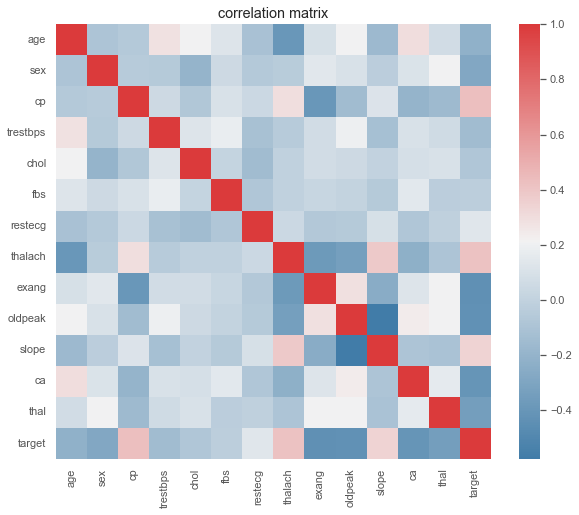

In [6]:
f,ax = plt.subplots(figsize=(10,8))

ax.set_title('correlation matrix')

data_corr = data.corr()

sns.heatmap(data_corr, mask=np.zeros_like(data_corr, dtype=np.bool_),cmap=sns.diverging_palette(240,12, as_cmap=True), ax=ax, square=True)

In [7]:
num_val = ['age','trestbps','chol','thalach','oldpeak']
cat_val = ['sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [8]:
col_trans = ColumnTransformer( 
     [ 
         ('num', StandardScaler(), num_val),
         ('cat', OrdinalEncoder(), cat_val)
     ]
)

x = data.drop(columns=['target'])
x = pd.DataFrame(col_trans.fit_transform(x))
x
y = data.target
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 302, dtype: int64

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=42, test_size=0.3)

In [10]:
logreg = LogisticRegression()

logreg.fit(x_train,y_train)

y_true = y_test
y_pred = logreg.predict(x_test)

acc_scr = accuracy_score(y_true,y_pred).round(3)

acc_scr

0.824